# **📜 LAB 4** -  Proof of Work (Mining a Block) 🚀

🔍 Objective:

In this lab, we will implement a Proof of Work (PoW) mechanism to make adding blocks more secure and computationally expensive. This simulates how Bitcoin miners solve cryptographic puzzles before adding new blocks.



🔥 By the end of this lab, you’ll understand how Proof of Work ensures blockchain security and why Bitcoin mining requires so much computational power! 🚀

## 1️⃣ Understanding Proof of Work (PoW) 🛠️

Why is Proof of Work needed? 🤔
Imagine you are in a classroom where students can write their names on a list to claim a prize. What if someone cheats by writing their name multiple times? We need a rule to make adding names difficult so that only those who truly deserve the prize can enter their names.

🔹 In blockchain, PoW makes adding new blocks difficult to prevent fraud and spam.

🔹 Without PoW, anyone could easily change transaction history and manipulate the system.

How does Proof of Work prevent fraud? 🚫🛑
Let's see an example:

💡 Suppose we allow adding new transactions without any difficulty. Someone could simply edit old transactions and replace them with fake ones. PoW ensures that adding blocks requires solving a puzzle so no one can easily tamper with past data.

📌 Example: A simple blockchain without PoW (easy to cheat)

🛑 Issue: Anyone can change a past block and re-run this program to generate new hashes!

In [ ]:
import hashlib
import time

# Fake blockchain (List of blocks)
blockchain = []

# Function to create a new block
def create_block(data, previous_hash=""):
    block = {
        "data": data,
        "timestamp": time.time(),
        "previous_hash": previous_hash,
        "hash": hashlib.sha256((data + previous_hash).encode()).hexdigest()  # Easy hash
    }
    return block

# Adding blocks (EASY to manipulate)
blockchain.append(create_block("Transaction 1"))
blockchain.append(create_block("Transaction 2", blockchain[-1]["hash"]))
blockchain.append(create_block("Transaction 3", blockchain[-1]["hash"]))

# Display blockchain
for block in blockchain:
    print(block)


{'data': 'Transaction 1', 'timestamp': 1740822754.1925032, 'previous_hash': '', 'hash': 'dff3b30655dc240deca00ed22fae68fdf8cf465bbe99bb2b2e24259cc1daac3a'}
{'data': 'Transaction 2', 'timestamp': 1740822754.1926167, 'previous_hash': 'dff3b30655dc240deca00ed22fae68fdf8cf465bbe99bb2b2e24259cc1daac3a', 'hash': '6552affdd08bdab9e4d071a00269fd40e4c9212f3e7cd8307d413c5aaee3ce98'}
{'data': 'Transaction 3', 'timestamp': 1740822754.1926785, 'previous_hash': '6552affdd08bdab9e4d071a00269fd40e4c9212f3e7cd8307d413c5aaee3ce98', 'hash': '44e24671d85972c049efbc619bad42623b383557bc18c96e01668fe7b6707ac7'}


What is a Nonce? 🔢
🔹 A Nonce is a random number that miners change to find a valid block hash.
🔹 The goal is to find a hash that meets a specific difficulty condition (e.g., starts with '0000').

💡 Example: Let's generate a hash with different nonce values

⛏️ Mining involves changing the nonce until a valid hash is found!

In [ ]:
nonce = 0
data = "Transaction Data"
previous_hash = "abc123"

while True:
    text_to_hash = data + previous_hash + str(nonce)
    new_hash = hashlib.sha256(text_to_hash.encode()).hexdigest()

    if new_hash[:4] == "0000":  # Condition to simulate difficulty
        print(f"Valid Hash Found! 🎉 Nonce: {nonce}, Hash: {new_hash}")
        break
    else:
        nonce += 1  # Keep trying until we find a valid hash


Valid Hash Found! 🎉 Nonce: 261984, Hash: 00008188c9855ade38369abdcfb4fedd3857b5d33208256f3b41e4e12e85d3b8


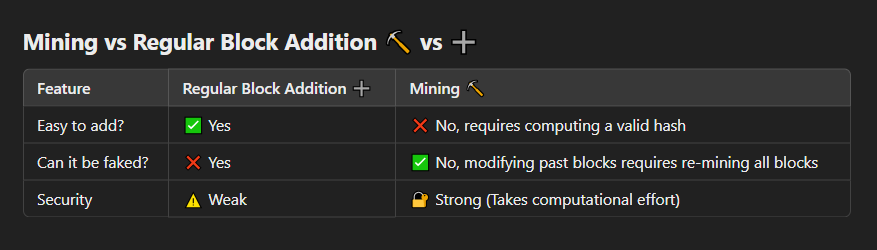

## 2️⃣ Introducing the Nonce 🔢

Now that we understand why Proof of Work (PoW) is important, let's see how we can add a Nonce to our block structure and how it helps in mining.



Step 1: Creating a Simple Block Without a Nonce

🔹 A block is just a dictionary storing transaction data, timestamp, previous block hash, and its own hash.

🔹 Let's first create a simple block structure without a Nonce.

📌 Basic Block Example (Without Nonce)

🔹 Issue? The hash is generated instantly without any difficulty. This makes it easy to fake data!

In [ ]:
import hashlib
import time

def create_block(data, previous_hash=""):
    block = {
        "data": data,
        "timestamp": time.time(),
        "previous_hash": previous_hash
    }
    # Generating a hash without nonce
    block_string = str(block["data"]) + str(block["timestamp"]) + block["previous_hash"]
    block["hash"] = hashlib.sha256(block_string.encode()).hexdigest()
    return block

# Creating a block
block = create_block("Transaction 1")
print(block)


{'data': 'Transaction 1', 'timestamp': 1740822834.760155, 'previous_hash': '', 'hash': '453adcc1c20c6bd7ffa6c9dab2171e63310c0d8256c32b7d5020c0c64378d51e'}


Step 2: Adding a Nonce to Our Block 🔢

Now, let’s introduce a Nonce (a number that we keep changing) to find a valid hash that starts with "0000".

📌 Updated Block with Nonce

In [ ]:
import hashlib
import time

def create_block_with_nonce(data, previous_hash=""):
    nonce = 0  # Start with 0
    while True:
        block = {
            "data": data,
            "timestamp": time.time(),
            "previous_hash": previous_hash,
            "nonce": nonce  # Nonce added!
        }
        # Create a hash including the nonce
        block_string = str(block["data"]) + str(block["timestamp"]) + block["previous_hash"] + str(block["nonce"])
        block["hash"] = hashlib.sha256(block_string.encode()).hexdigest()

        # Mining Condition: Hash must start with '0000'
        if block["hash"][:4] == "0000":
            return block  # Stop when a valid hash is found
        else:
            nonce += 1  # Keep trying different nonce values

# Creating a mined block
block = create_block_with_nonce("Transaction 1")
print(block)


{'data': 'Transaction 1', 'timestamp': 1740822863.2368762, 'previous_hash': '', 'nonce': 242643, 'hash': '000035e115321aeea3ec23a5ce05ad0f1c68807360c8a6b2dfe4c2f5b611b237'}


Step 3: Understanding How Nonce Affects Hashes

🔹 The Nonce is randomly changed until we get a valid hash that follows a difficulty condition.

🔹 This process is called mining.

📌 Example: See how changing Nonce affects the hash

⛏️ Notice how the hash completely changes with every new Nonce value? This is why mining takes time!

In [ ]:
import hashlib

data = "Transaction 1"
previous_hash = "abc123"

for nonce in range(5):  # Trying 5 different nonces
    block_string = data + previous_hash + str(nonce)
    new_hash = hashlib.sha256(block_string.encode()).hexdigest()
    print(f"Nonce: {nonce}, Hash: {new_hash}")


Nonce: 0, Hash: 7b47a534f7e50d0bfdbf3345d2845a606a342cf9a8fe714dc7c38b6b5cc2cd9d
Nonce: 1, Hash: 63ead813202e2e8e6d14a2dbe712fc0da6074951a81dea344dbc1656f3577196
Nonce: 2, Hash: 3019802470f48a85d0a90dd7245170ad04a1226428f966abbd52ca6ded113bd9
Nonce: 3, Hash: c83a9c688baed34d206e709ba979666572c06cb3197f723665dafe6533b05405
Nonce: 4, Hash: a0e390faeb36fa652e28daf30f21841ac4e945269fb940e7441026bdf2ea5f70


🔚 Summary:

✅ We added a Nonce to our block structure

✅ The Nonce is adjusted until we find a valid hash

✅ This prevents fraud and makes blockchain secure

🚀 Next Step: Let's mine a real blockchain with multiple blocks!

## 3️⃣ Implementing Proof of Work 🛠️

Now that we understand how a Nonce affects the hash, let's actually mine a block by implementing Proof of Work (PoW).

PoW requires us to find a valid hash that meets a certain condition. This is what miners do in real blockchain systems like Bitcoin!



Step 1: Writing a Function to Find a Valid Hash

📌 Goal: We will try different Nonce values until we find a hash that starts with "0000".

🔹 Let's start with mining a single block.

In [ ]:
import hashlib
import time

def mine_block(data, previous_hash, difficulty=4):
    nonce = 0  # Start with 0
    prefix = "0" * difficulty  # Create a string like "0000" for difficulty

    while True:
        block = {
            "data": data,
            "timestamp": time.time(),
            "previous_hash": previous_hash,
            "nonce": nonce
        }
        block_string = str(block["data"]) + str(block["timestamp"]) + block["previous_hash"] + str(block["nonce"])
        block["hash"] = hashlib.sha256(block_string.encode()).hexdigest()

        # Mining Condition: Hash must start with "0000"
        if block["hash"].startswith(prefix):
            return block  # Valid block found! Stop mining.
        else:
            nonce += 1  # Keep trying different nonce values

# Test mining
mined_block = mine_block("Transaction 1", "abc123")
print(mined_block)


{'data': 'Transaction 1', 'timestamp': 1740822942.1828682, 'previous_hash': 'abc123', 'nonce': 112822, 'hash': '0000df4d082f19fd5b12720aba4079d3b278908055b035e4b04a9f6bf57fa3c7'}


✅ What’s Happening?

We start with nonce = 0 and keep changing it.

We generate a new hash each time.

If the hash starts with "0000", we stop mining.

Otherwise, we increase nonce and try again.


Step 2: Setting Up a Difficulty Level

🔹 The difficulty is the number of leading zeros required in the hash (e.g., "0000" for difficulty = 4).

📌 Let’s experiment with different difficulty levels:

In [ ]:
difficulty_levels = [2, 3, 4, 5]  # Different levels

for diff in difficulty_levels:
    start_time = time.time()
    mined_block = mine_block("Transaction 2", "xyz789", difficulty=diff)
    end_time = time.time()

    print(f"\n🔹 Difficulty: {diff}")
    print(f"Nonce: {mined_block['nonce']}")
    print(f"Hash: {mined_block['hash']}")
    print(f"⏳ Mining Time: {end_time - start_time:.4f} seconds")



🔹 Difficulty: 2
Nonce: 6
Hash: 00b476ccda7269df35271ac30ee15344b848b5dde42967552cc63d9ed3789e20
⏳ Mining Time: 0.0000 seconds

🔹 Difficulty: 3
Nonce: 11260
Hash: 00096d798dc380c4e2b76ba5bf918f289ca9bdac3d5c4e6de2c79ea9827e9151
⏳ Mining Time: 0.0306 seconds

🔹 Difficulty: 4
Nonce: 31947
Hash: 0000d19d49f8002ced80f99d88798b24e524570f9efad987e656eacb38fa2801
⏳ Mining Time: 0.0756 seconds

🔹 Difficulty: 5
Nonce: 675919
Hash: 00000fc6c8b66eef6c2627d93a0eec3499037510a0f9fe4066a58db1ca067858
⏳ Mining Time: 1.6722 seconds


✅ What’s Happening?

As we increase the difficulty, mining takes longer ⏳.

This is because finding a hash with more leading zeros is harder.

📌 Real-world Example:

Bitcoin has a difficulty level of around 19–20 leading zeros! That’s why it takes powerful computers to mine a Bitcoin block!

Step 3: Simulating Mining Time ⏳
Let’s visualize how mining time increases with higher difficulty.

🔹 We will mine 5 blocks at difficulty = 4 and measure the time taken.

Block 1 mined in 0.2002 seconds.
Block 2 mined in 0.0903 seconds.
Block 3 mined in 0.8489 seconds.
Block 4 mined in 0.0631 seconds.
Block 5 mined in 0.3787 seconds.


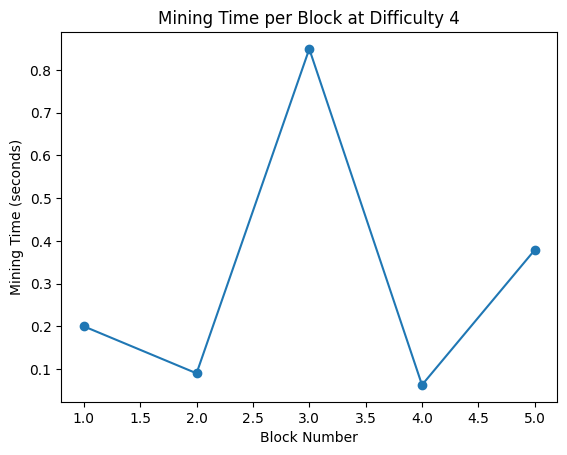

In [ ]:
import matplotlib.pyplot as plt

times = []
for i in range(5):
    start_time = time.time()
    mine_block(f"Transaction {i}", "xyz789", difficulty=4)
    end_time = time.time()

    mining_time = end_time - start_time
    times.append(mining_time)
    print(f"Block {i+1} mined in {mining_time:.4f} seconds.")

# Plot mining times
plt.plot(range(1, 6), times, marker="o", linestyle="-")
plt.xlabel("Block Number")
plt.ylabel("Mining Time (seconds)")
plt.title("Mining Time per Block at Difficulty 4")
plt.show()


✅ Observations:

Mining time varies even at the same difficulty because hashing is random.
Higher difficulty = more time to mine.


## 4️⃣ Adjusting Difficulty & Observing Mining Time ⏳

Now that we’ve implemented Proof of Work (PoW), let’s see what happens when we increase the difficulty.

🔹 Step 1: What Happens When We Increase Difficulty?

📌 Difficulty controls how hard mining is.

The more leading zeros required in the hash, the longer it takes to mine a block.

In real blockchain networks like Bitcoin, difficulty adjusts automatically to ensure blocks are mined at a stable rate.


🔹 Step 2: Experimenting with Different Difficulty Levels

Now, let’s try mining a block at different difficulty levels and measure the mining time.

In [ ]:
import hashlib
import time

def mine_block(data, previous_hash, difficulty):
    nonce = 0
    prefix = "0" * difficulty

    while True:
        block = {
            "data": data,
            "timestamp": time.time(),
            "previous_hash": previous_hash,
            "nonce": nonce
        }
        block_string = str(block["data"]) + str(block["timestamp"]) + block["previous_hash"] + str(block["nonce"])
        block["hash"] = hashlib.sha256(block_string.encode()).hexdigest()

        if block["hash"].startswith(prefix):
            return block, nonce  # Return the block and the nonce value
        else:
            nonce += 1

# Try different difficulty levels
difficulty_levels = [2, 3, 4, 5]

for difficulty in difficulty_levels:
    start_time = time.time()
    mined_block, final_nonce = mine_block("Transaction Data", "abc123", difficulty)
    end_time = time.time()

    print(f"\n🔹 Difficulty: {difficulty}")
    print(f"Nonce found: {final_nonce}")
    print(f"Valid Hash: {mined_block['hash']}")
    print(f"⏳ Mining Time: {end_time - start_time:.4f} seconds")



🔹 Difficulty: 2
Nonce found: 218
Valid Hash: 00521f54d14d44fe6f8633714e3479069c21a253bc5d91810a79e382c5948039
⏳ Mining Time: 0.0017 seconds

🔹 Difficulty: 3
Nonce found: 2723
Valid Hash: 000733c06020c038dc93059a3ca9297dce4fbffb943d64c34471a3095758ff53
⏳ Mining Time: 0.0136 seconds

🔹 Difficulty: 4
Nonce found: 52724
Valid Hash: 0000d400794040c7bc7e0a8962df8d849c82cb954b513db9e1bbe72fd0eacff2
⏳ Mining Time: 0.2445 seconds

🔹 Difficulty: 5
Nonce found: 31919
Valid Hash: 000005c572d1587211bc15c087d19c98546fb577da84681203d3fdf69902f894
⏳ Mining Time: 0.1524 seconds


✅ What’s Happening?

We try different difficulty levels (2, 3, 4, 5).
Mining time increases as difficulty increases.

We print the nonce, the valid hash, and the time taken to mine the block.


🔹 Step 3: Comparing Mining Speeds 📈

Now, let’s visualize how mining time changes with difficulty.



⛏️ Difficulty 2: Mined in 0.0005 seconds.
⛏️ Difficulty 3: Mined in 0.0073 seconds.
⛏️ Difficulty 4: Mined in 0.4257 seconds.
⛏️ Difficulty 5: Mined in 1.6802 seconds.


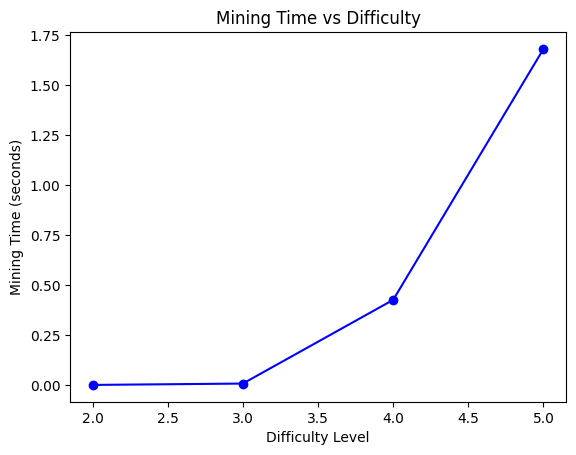

In [ ]:
import matplotlib.pyplot as plt

difficulties = [2, 3, 4, 5]
times = []

for diff in difficulties:
    start_time = time.time()
    mine_block("Experiment Block", "xyz789", diff)
    end_time = time.time()

    mining_time = end_time - start_time
    times.append(mining_time)
    print(f"⛏️ Difficulty {diff}: Mined in {mining_time:.4f} seconds.")

# Plotting the results
plt.plot(difficulties, times, marker="o", linestyle="-", color="blue")
plt.xlabel("Difficulty Level")
plt.ylabel("Mining Time (seconds)")
plt.title("Mining Time vs Difficulty")
plt.show()


✅ Observations:

Low difficulty (2 or 3) → Blocks are mined quickly.

Higher difficulty (5 or 6) → Mining takes much longer.

The graph shows mining time increases with difficulty.

## 5️⃣ Simulating Mining Like Bitcoin Miners ⛏️

Now, let’s explore how different miners (computers) perform when mining blocks.

🔹 Step 1: Trying Out Different Miners (Faster vs Slower Computers)

📌 In the real world, powerful computers (miners) solve the Proof-of-Work (PoW) problem faster.

📌 Let’s simulate this by changing the speed of mining using different CPU power levels.

In [ ]:
import hashlib
import time
import random

def mine_block(data, previous_hash, difficulty, mining_power):
    nonce = 0
    prefix = "0" * difficulty
    start_time = time.time()

    while True:
        block_string = str(data) + str(time.time()) + previous_hash + str(nonce)
        block_hash = hashlib.sha256(block_string.encode()).hexdigest()

        if block_hash.startswith(prefix):
            mining_time = time.time() - start_time
            return block_hash, nonce, mining_time
        else:
            nonce += mining_power  # Faster miners try more nonces per second

# Simulating different miners
mining_powers = {"Slow Miner": 1, "Average Miner": 5, "Fast Miner": 20}

for miner, power in mining_powers.items():
    block_hash, nonce, mining_time = mine_block("Block Data", "prev123", 4, power)

    print(f"\n⚒️ {miner} (Power: {power} nonces per step)")
    print(f"🔢 Nonce found: {nonce}")
    print(f"🔗 Hash: {block_hash}")
    print(f"⏳ Mining Time: {mining_time:.4f} seconds")



⚒️ Slow Miner (Power: 1 nonces per step)
🔢 Nonce found: 103716
🔗 Hash: 00000bbb3c9ae1341e25b145455bb2f34768f058f7b6995650e928cdab865517
⏳ Mining Time: 0.2255 seconds

⚒️ Average Miner (Power: 5 nonces per step)
🔢 Nonce found: 64025
🔗 Hash: 0000929d5fe875b0cbf6f15881e026611f2501d8a2eab84c798aa9fc3ed8580e
⏳ Mining Time: 0.0274 seconds

⚒️ Fast Miner (Power: 20 nonces per step)
🔢 Nonce found: 862360
🔗 Hash: 0000c83713cb2154be1d0916b779c50ac6d7ecf8ee57f82cae1606a7a6276fee
⏳ Mining Time: 0.0962 seconds


✅ What’s Happening?

The Slow Miner checks 1 nonce at a time (slowest).

The Average Miner jumps 5 nonces at a time (medium speed).

The Fast Miner skips 20 nonces per step (fastest).

The Fast Miner finds a valid block the quickest, just like in Bitcoin mining.


🔹 Step 2: How Real-World Miners Compete
📌 In real-world mining:

Thousands of miners compete to find a valid hash first ⏳.

The miner who finds it first gets rewarded (e.g., Bitcoin).

More mining power = better chance of winning.

Let’s simulate multiple miners competing to mine a block.

In [ ]:
def mining_race(difficulty):
    miners = ["Miner A", "Miner B", "Miner C"]
    times = {}

    for miner in miners:
        block_hash, nonce, mining_time = mine_block("Block Data", "prev456", difficulty, random.randint(5, 20))
        times[miner] = mining_time
        print(f"⛏️ {miner} mined a block in {mining_time:.4f} seconds.")

    winner = min(times, key=times.get)
    print(f"\n🏆 {winner} won the mining race!\n")

# Simulate a mining race
mining_race(4)


⛏️ Miner A mined a block in 0.0577 seconds.
⛏️ Miner B mined a block in 0.0223 seconds.
⛏️ Miner C mined a block in 0.0121 seconds.

🏆 Miner C won the mining race!



✅ What’s Happening?

Three miners are competing.

Each has a random mining power (simulating real-world competition).

The fastest miner wins the block! 🏆

## 6️⃣ Demonstrating a Successful Mine ✅

Now, let’s simulate the full mining process:

Mine a new block ⛏️

Add it to the blockchain 🔗

Print the mined block and its hash 🖥️

🔹 Step 1: Mining a New Block

📌 We’ll mine a block using our Proof-of-Work function.

In [ ]:
blockchain = []

def create_block(data, previous_hash, difficulty):
    block_hash, nonce, mining_time = mine_block(data, previous_hash, difficulty, 10)
    block = {
        "data": data,
        "previous_hash": previous_hash,
        "nonce": nonce,
        "hash": block_hash,
        "timestamp": time.time()
    }
    return block, mining_time

# Mining a new block
new_block, mining_time = create_block("Patient X - CT Scan", "genesis_block_hash", 4)


🔹 Step 2: Adding the Block to the Blockchain
📌 Once mined, the block is stored in the blockchain.

In [ ]:
blockchain.append(new_block)

print("\n✅ New Block Added!")
print(f"⛏️ Mined in {mining_time:.4f} seconds")
print(f"🔗 Hash: {new_block['hash']}")
print(f"📜 Previous Hash: {new_block['previous_hash']}")



✅ New Block Added!
⛏️ Mined in 0.3990 seconds
🔗 Hash: 0000cf6e20e886f0bc43ad3dcf1a4adbf6df97bdda0cdb5cfb6cc3210665a6d6
📜 Previous Hash: genesis_block_hash


🔹 Step 3: Printing the Full Blockchain

📌 Let’s display our blockchain to see how blocks are linked.

In [ ]:
print("\n🔗 Current Blockchain:")
for block in blockchain:
    print(f"\n📜 Data: {block['data']}")
    print(f"⏳ Timestamp: {block['timestamp']}")
    print(f"🔢 Nonce: {block['nonce']}")
    print(f"🔗 Hash: {block['hash']}")
    print(f"↩️ Previous Hash: {block['previous_hash']}")



🔗 Current Blockchain:

📜 Data: Patient X - CT Scan
⏳ Timestamp: 1740823274.183644
🔢 Nonce: 1562870
🔗 Hash: 0000cf6e20e886f0bc43ad3dcf1a4adbf6df97bdda0cdb5cfb6cc3210665a6d6
↩️ Previous Hash: genesis_block_hash


🔚 Summary:

✅ Miners compete to mine blocks based on computing power.

✅ Mining a block requires finding a valid nonce using PoW.

✅ Once mined, the block is added to the blockchain securely.

🚀 Next Step: Let’s implement blockchain validation to detect tampering! 🔒